<a href="https://colab.research.google.com/github/aprilpapa/test1/blob/main/Short_Position_ratio_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

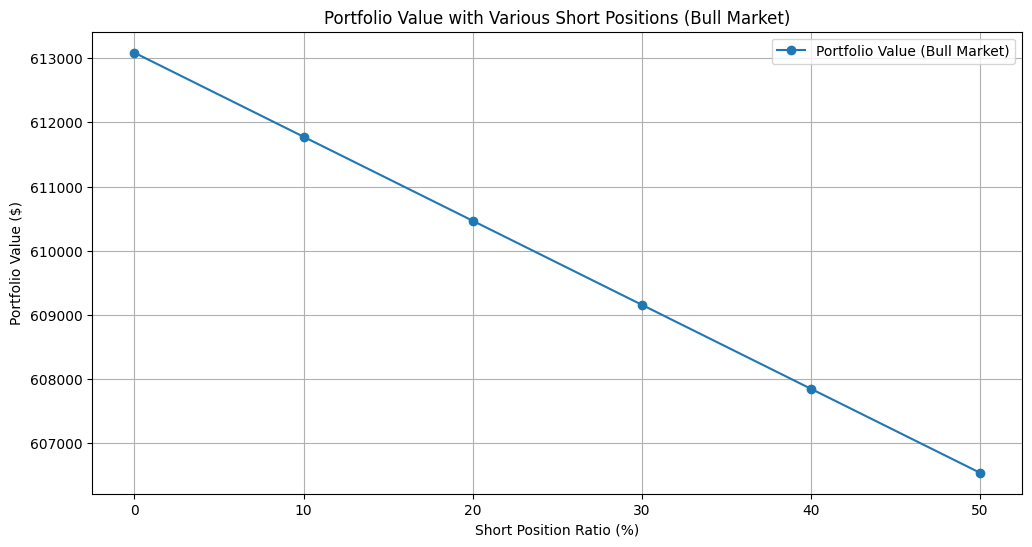

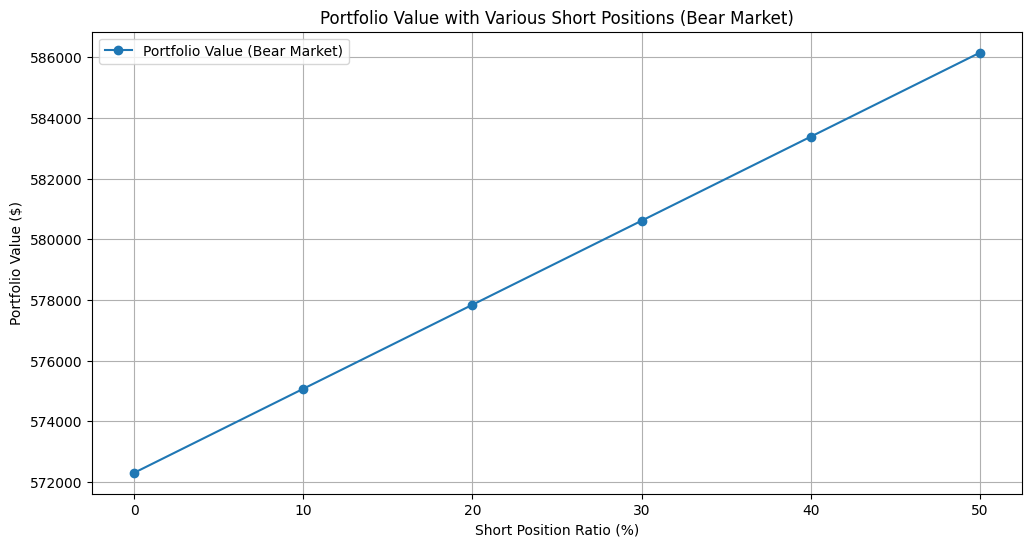

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 초기 설정
btc_holdings = 10
initial_price = 60000
initial_btc_value = btc_holdings * initial_price  # 초기 가치 설정

# 3년 간의 상승장과 하락장 시나리오 데이터 생성
dates = pd.date_range(start="2021-07-15", end="2024-07-15")
np.random.seed(42)
bull_market_prices = np.random.lognormal(mean=0.02, sigma=0.02, size=len(dates)) * initial_price
bear_market_prices = np.random.lognormal(mean=-0.02, sigma=0.02, size=len(dates)) * initial_price

# 데이터프레임 생성
df_bull = pd.DataFrame({"Date": dates, "Price": bull_market_prices})
df_bull.set_index("Date", inplace=True)

df_bear = pd.DataFrame({"Date": dates, "Price": bear_market_prices})
df_bear.set_index("Date", inplace=True)

# 다양한 숏 포지션 비율을 테스트 (0%에서 50%까지 10% 간격)
short_ratios = np.arange(0, 0.6, 0.1)

# 포트폴리오 가치와 미분값 계산
portfolio_values_bull = []
portfolio_values_bear = []

for ratio in short_ratios:
    short_position_value = ratio * initial_btc_value  # 숏 포지션 가치
    df_bull[f'Short_Position_PnL_{int(ratio*100)}'] = short_position_value * (initial_price - df_bull['Price']) / initial_price
    df_bull[f'Portfolio_Value_With_Short_{int(ratio*100)}'] = (btc_holdings * df_bull['Price']) + df_bull[f'Short_Position_PnL_{int(ratio*100)}']
    portfolio_values_bull.append(df_bull[f'Portfolio_Value_With_Short_{int(ratio*100)}'].iloc[-1])

    df_bear[f'Short_Position_PnL_{int(ratio*100)}'] = short_position_value * (initial_price - df_bear['Price']) / initial_price
    df_bear[f'Portfolio_Value_With_Short_{int(ratio*100)}'] = (btc_holdings * df_bear['Price']) + df_bear[f'Short_Position_PnL_{int(ratio*100)}']
    portfolio_values_bear.append(df_bear[f'Portfolio_Value_With_Short_{int(ratio*100)}'].iloc[-1])

# 포트폴리오 가치 시각화 (상승장)
plt.figure(figsize=(12, 6))
plt.plot(short_ratios * 100, portfolio_values_bull, label='Portfolio Value (Bull Market)', marker='o', linestyle='-')
plt.xlabel('Short Position Ratio (%)')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value with Various Short Positions (Bull Market)')
plt.legend()
plt.grid(True)
plt.show()

# 포트폴리오 가치 시각화 (하락장)
plt.figure(figsize=(12, 6))
plt.plot(short_ratios * 100, portfolio_values_bear, label='Portfolio Value (Bear Market)', marker='o', linestyle='-')
plt.xlabel('Short Position Ratio (%)')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value with Various Short Positions (Bear Market)')
plt.legend()
plt.grid(True)
plt.show()